In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Carregando os dados

In [2]:
dados=pd.read_csv('Dados/Ocorrencias_Aeronaves.csv', sep = ',', low_memory=False)
dados_filtrados = dados.drop(['codigo_ocorrencia2','ocorrencia_dia', 'aeronave_pmd'], axis=1)
dados_filtrados

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,Dia,Mes,Ano,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,INCIDENTE,RIO DE JANEIRO,RJ,****,3,1,2010,PRCHE,HELICÓPTERO,SIKORSKY AIRCRAFT,S-76C,S76,TURBOEIXO,BIMOTOR,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
1,INCIDENTE,BELÉM,PA,SBBE,3,1,2010,PRMAB,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
2,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,3,1,2010,PRMBW,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,LEVE,0
3,ACIDENTE,LUCAS DO RIO VERDE,MT,****,4,1,2010,PTURT,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
4,INCIDENTE,PELOTAS,RS,SBPK,5,1,2010,PPPSB,AVIÃO,EMBRAER,EMB-120ER,E120,TURBOÉLICE,BIMOTOR,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,INCIDENTE,CAMPINAS,SP,SBKP,29,12,2020,PRAJZ,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,NENHUM,0
5817,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30,12,2020,PTGZR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,LEVE,0
5818,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30,12,2020,PRGUF,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0
5819,INCIDENTE GRAVE,VICENTINA,MS,****,31,12,2020,PTGUP,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0


In [3]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ocorrencia_classificacao    5821 non-null   object
 1   ocorrencia_cidade           5821 non-null   object
 2   ocorrencia_uf               5821 non-null   object
 3   ocorrencia_aerodromo        5821 non-null   object
 4   Dia                         5821 non-null   int64 
 5   Mes                         5821 non-null   int64 
 6   Ano                         5821 non-null   int64 
 7   aeronave_matricula          5821 non-null   object
 8   aeronave_tipo_veiculo       5821 non-null   object
 9   aeronave_fabricante         5821 non-null   object
 10  aeronave_modelo             5821 non-null   object
 11  aeronave_tipo_icao          5821 non-null   object
 12  aeronave_motor_tipo         5821 non-null   object
 13  aeronave_motor_quantidade   5821 non-null   obje

In [4]:
dados_filtrados.describe()

,Dia,Mes,Ano,aeronave_fatalidades_total
count,5821.000000,5821.000000,5821.000000,5821.00000
mean,15.774094,6.390139,2014.706580,0.15049
std,8.711271,3.490217,3.182934,0.68290
min,1.000000,1.000000,2010.000000,0.00000
25%,8.000000,3.000000,2012.000000,0.00000
50%,16.000000,6.000000,2014.000000,0.00000
75%,23.000000,9.000000,2018.000000,0.00000
max,31.000000,12.000000,2020.000000,16.00000


# Checando quantas ocorrências de acidentes, incidente e incidentes graves há

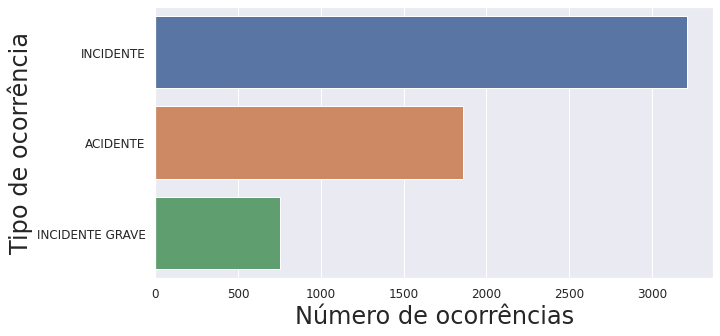

In [5]:
fig = plt.figure(figsize=(10,5))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

sns.countplot(y=dados_filtrados.ocorrencia_classificacao ,data=dados_filtrados)
plt.xlabel("Número de ocorrências")
plt.ylabel("Tipo de ocorrência")

plt.show()

### Aqui podemos ver que as classes estão desbalanceadas

# One Hot Encoding

### Para transformar os objetos em valores numéricos

In [6]:
le = preprocessing.LabelEncoder()
for column in dados_filtrados.columns:
    if(dados_filtrados[column].dtypes=='object'):
        dados_filtrados[column] = le.fit_transform(dados_filtrados[column])
        
dados_filtrados.head()

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,Dia,Mes,Ano,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,1,847,19,2,3,1,2010,957,5,214,724,224,4,1,12,324,320,8,3,0
1,1,116,14,16,3,1,2010,1540,2,17,242,11,1,1,11,324,320,8,2,0
2,1,847,19,102,3,1,2010,1572,2,17,239,10,1,1,11,324,320,17,2,0
3,0,578,13,2,4,1,2010,3473,2,168,438,162,2,2,10,257,252,31,4,0
4,1,753,23,91,5,1,2010,552,2,72,424,129,5,1,11,324,320,30,3,0


# Checando a correlação entre os atributos

In [7]:
corr = dados_filtrados.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,Dia,Mes,Ano,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
ocorrencia_classificacao,1.000000,0.019443,-0.026543,0.036211,0.003857,0.008864,0.008861,-0.189504,-0.154665,-0.085478,-0.101026,-0.129564,0.031365,-0.161797,0.179351,0.005251,0.013423,0.062983,-0.259001,-0.278106
ocorrencia_cidade,0.019443,1.000000,0.092353,0.042989,-0.012850,0.001319,-0.004719,0.003119,0.003030,0.006769,0.017113,-0.005383,0.000353,0.005367,-0.013293,0.075327,0.126228,0.023668,-0.013498,-0.012905
ocorrencia_uf,-0.026543,0.092353,1.000000,-0.061175,0.010976,0.007427,0.027571,-0.074592,0.032069,-0.011360,-0.018015,-0.040454,-0.069114,0.061925,-0.098397,-0.044437,-0.076869,0.004414,0.020698,-0.037696
ocorrencia_aerodromo,0.036211,0.042989,-0.061175,1.000000,0.009372,0.012800,0.045300,-0.001523,-0.021283,-0.017128,-0.003460,0.024359,-0.003695,0.037495,0.031842,-0.029091,-0.018552,0.020524,0.080517,-0.066307
Dia,0.003857,-0.012850,0.010976,0.009372,1.000000,0.008494,0.003291,-0.011757,-0.007153,-0.029377,-0.017880,-0.024951,0.009906,0.000119,-0.013801,-0.007626,0.012211,-0.013393,-0.002318,-0.011758
Mes,0.008864,0.001319,0.007427,0.012800,0.008494,1.000000,-0.008996,-0.016460,0.007688,-0.001481,-0.014331,-0.005948,-0.011615,-0.025407,0.020023,-0.018801,-0.014820,-0.003456,-0.011530,0.011623
Ano,0.008861,-0.004719,0.027571,0.045300,0.003291,-0.008996,1.000000,-0.003080,-0.021595,-0.025311,-0.028291,-0.042536,-0.030368,0.079938,-0.086762,-0.022270,-0.048557,-0.075618,-0.000428,-0.008692
aeronave_matricula,-0.189504,0.003119,-0.074592,-0.001523,-0.011757,-0.016460,-0.003080,1.000000,0.307502,0.129562,0.136636,0.346543,-0.075666,0.096621,-0.119937,-0.031069,-0.032998,-0.007185,0.069412,0.076761
aeronave_tipo_veiculo,-0.154665,0.003030,0.032069,-0.021283,-0.007153,0.007688,-0.021595,0.307502,1.000000,0.055726,0.263274,0.330461,0.136433,0.122787,-0.248516,-0.024491,-0.019209,-0.035206,0.014397,0.097752
aeronave_fabricante,-0.085478,0.006769,-0.011360,-0.017128,-0.029377,-0.001481,-0.025311,0.129562,0.055726,1.000000,0.517486,0.613669,0.067120,-0.004714,-0.015298,-0.018062,-0.061800,0.045670,0.057819,0.011802


# Criando modelo de classificação para saber qual o tipo de ocorrência a aeronave sofrerá

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

### Separando os atributos dos rótulos

In [9]:
X = dados_filtrados.drop(['ocorrencia_classificacao'], axis = 1)
y = dados_filtrados['ocorrencia_classificacao']

### Função que retorna a acurácia, matriz de confusão, report e y predito

In [10]:
def results(X_train, X_test, y_train, y_test, y_pred):
    model_accuracy = round(accuracy_score(y_test, y_pred),2)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fscore = f1_score(y_test, y_pred, average='weighted')
    return model_accuracy,cm, y_pred, report, fscore


### Criando os modelos de Aprendizagem de Máquina

In [11]:
# Support Vector Machines

def compute_svm(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return results(X_train, X_test, y_train, y_test, y_pred)
    

In [12]:
# K-Nearest Neighbor

def compute_knn(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    neigh = KNeighborsClassifier()
    neigh.fit(X, y)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    return results(X_train, X_test, y_train, y_test, y_pred)

In [13]:
# Artificial Neural Network

def compute_neural_network(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Escalonamento de atributos porque não queremos uma variável independente dominando a outra, tornando os cálculos fáceis
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    nn.fit(X, y)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)

    return results(X_train, X_test, y_train, y_test, y_pred)

In [14]:
# eXtreme Gradient Boosted Decision Trees

def compute_xgboost(X,y):

    # Splitando o dataset em Treinamento e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    xgboost_probs = xgboost.predict_proba(X_test)

    return results(X_train, X_test, y_train, y_test, y_pred)

### Vi que as classes estão desbalanceadas, provavelmente os classificadores acertarão as classes majoritárias, aqui vou testar os métodos para comprovar minha teoria

In [15]:
model_accuracy,cm, y_pred, report, fscore = compute_svm(X, y)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.83
F1-Score:
0.7868497024034384
Confusion Matrix:
[[499  45   4]
 [ 23 948   8]
 [ 71 140   9]]
Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       548
           1       0.84      0.97      0.90       979
           2       0.43      0.04      0.07       220

    accuracy                           0.83      1747
   macro avg       0.70      0.64      0.62      1747
weighted avg       0.79      0.83      0.79      1747



In [16]:
model_accuracy,cm, y_pred, report, fscore = compute_knn(X, y)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.77
F1-Score:
0.7377419223739468
Confusion Matrix:
[[423 111  14]
 [ 49 902  28]
 [ 63 137  20]]
Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       548
           1       0.78      0.92      0.85       979
           2       0.32      0.09      0.14       220

    accuracy                           0.77      1747
   macro avg       0.63      0.59      0.59      1747
weighted avg       0.73      0.77      0.74      1747



In [17]:
model_accuracy,cm, y_pred, report, fscore = compute_neural_network(X, y)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.83
F1-Score:
0.8252824565718644
Confusion Matrix:
[[495  24  29]
 [ 17 888  74]
 [ 53  96  71]]
Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       548
           1       0.88      0.91      0.89       979
           2       0.41      0.32      0.36       220

    accuracy                           0.83      1747
   macro avg       0.72      0.71      0.71      1747
weighted avg       0.82      0.83      0.83      1747



In [18]:
model_accuracy,cm, y_pred, report, fscore = compute_xgboost(X, y)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.87
F1-Score:
0.853878396913768
Confusion Matrix:
[[515  13  20]
 [ 12 929  38]
 [ 52  97  71]]
Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       548
           1       0.89      0.95      0.92       979
           2       0.55      0.32      0.41       220

    accuracy                           0.87      1747
   macro avg       0.78      0.74      0.75      1747
weighted avg       0.85      0.87      0.85      1747



# Apesar da acurácia ser alta (porque acerta as classes majoritárias), pode-se ver que os algoritmos têm dificuldade em acertar a classe minoritária, então vou utilizar técnicas de sobreamostragem

### Como o xgboost apresentou melhor acurácia e f1-score no teste anterior, vou utilizá-lo como classificador com as técnicas de sobreamostragem

In [19]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

### Balanceamento de classes usando o método Naive random over-sampling (RandomOverSampler)

In [20]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X, y)

In [21]:
model_accuracy,cm, y_pred, report, fscore = compute_xgboost(X_ros, y_ros)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.94
F1-Score:
0.9386216250323852
Confusion Matrix:
[[958  10  28]
 [  7 850  86]
 [  8  39 902]]
Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       996
           1       0.95      0.90      0.92       943
           2       0.89      0.95      0.92       949

    accuracy                           0.94      2888
   macro avg       0.94      0.94      0.94      2888
weighted avg       0.94      0.94      0.94      2888



### Testando a Técnica de Sobreamostragem de Minoria Sintética (Synthetic Minority Oversampling Technique - SMOTE) para criar dados sintéticos

In [22]:
X_smote, y_smote = SMOTE(random_state = 0).fit_resample(X, y)

In [23]:
model_accuracy,cm, y_pred, report, fscore = compute_xgboost(X_smote, y_smote)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.89
F1-Score:
0.8897749964944139
Confusion Matrix:
[[893  25  78]
 [ 16 854  73]
 [ 58  69 822]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       996
           1       0.90      0.91      0.90       943
           2       0.84      0.87      0.86       949

    accuracy                           0.89      2888
   macro avg       0.89      0.89      0.89      2888
weighted avg       0.89      0.89      0.89      2888



### Testando o método sintético adaptável (Adaptive Synthetic - ADASYN) para criar dados sintéticos

In [24]:
X_ADASYN, y_ADASYN = ADASYN(random_state = 0).fit_resample(X, y)

In [25]:
model_accuracy,cm, y_pred, report, fscore = compute_xgboost(X_ADASYN, y_ADASYN)
print("Model Accuracy:" + str(model_accuracy) +  "\n" + "F1-Score:\n" + str(fscore)+"\n" + "Confusion Matrix:\n" + str(cm) + "\n" + "Report:\n" + str(report))

Model Accuracy:0.9
F1-Score:
0.901240036918571
Confusion Matrix:
[[891  16  64]
 [ 10 862  77]
 [ 51  69 860]]
Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       971
           1       0.91      0.91      0.91       949
           2       0.86      0.88      0.87       980

    accuracy                           0.90      2900
   macro avg       0.90      0.90      0.90      2900
weighted avg       0.90      0.90      0.90      2900



### Com isso, pode-se ver que com dados sintéticos o modelo aprendeu mais sobre a classe minoritária e, portanto, preveu melhor os dados, melhorando todos os resultados das métricas estatísticas. Portanto, é possível que se tivessemos mais dados sobre a classe minoritária e os dados fossem balanceados, poderíamos prever se a aeronave soferia algum acidente, incidente ou incidente grave